## Linear Regression Assignment
In a watershed monitoring project, automated samplers are often used to collect water samples. However, these automated samplers may fail from time to time due to various instrumentation issues, such as power failure and damaged instruments. When the automated sampler failed to collect water samples, it leaves a data gap from a certain period of time. <br> 

Base flow nutrient concentration data are often linearly interpolated (or sometimes extrapolated) using nutrient data of the last and next sample collected. This approach cannot be applied to event flow nutrient and sediment (hereinafter refer as nutrient) data, especially phosphorus (P) and sediment (TSS), because of the large variations in nutrient concentration that can be caused by flow. <br>

The objectived of this task are to: <br>
1) develop a suitable model using existing dissolved reactive P (DRP), total P (TP), and TSS <br>
2) predict the missing DRP, TP, TSS data using the model developed in (1)

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [26]:
# import data from excel
data = pd.read_excel('JY_linear_reg_data.xlsx', sheet_name = 'Data')
data.head()

,Sample date,Site,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L)
0,2015-05-19,S11,0.028210,0.018,0.0015,22.333667,19.264296
1,2015-06-16,S11,0.189993,0.027,0.1770,1006.666667,892.000000
2,2015-06-30,S11,1.296460,0.203,1.2590,1338.666667,1194.666667
3,2015-08-18,S11,0.131722,0.050,1.3280,2026.000000,1812.000000
4,2015-08-25,S11,0.120204,0.010,3.1180,1722.000000,1560.000000


In [27]:
# drop 'VSS' column, rename the columns into shorter names

data = data.drop(columns=['VSS (mg/L)'])
data = data.rename(columns={'Sample date': 'Date', 'Flow (cms)':'Flow', 'DRP (mg P/L)':'DRP', 'TP (mg P/L)':'TP', 'TSS (mg/L)':'TSS'})
data.head()

,Date,Site,Flow,DRP,TP,TSS
0,2015-05-19,S11,0.028210,0.018,0.0015,22.333667
1,2015-06-16,S11,0.189993,0.027,0.1770,1006.666667
2,2015-06-30,S11,1.296460,0.203,1.2590,1338.666667
3,2015-08-18,S11,0.131722,0.050,1.3280,2026.000000
4,2015-08-25,S11,0.120204,0.010,3.1180,1722.000000


In [28]:
# check the number of null values
data.isnull().sum()

Date    0
Site    0
Flow    0
DRP     7
TP      7
TSS     7
dtype: int64

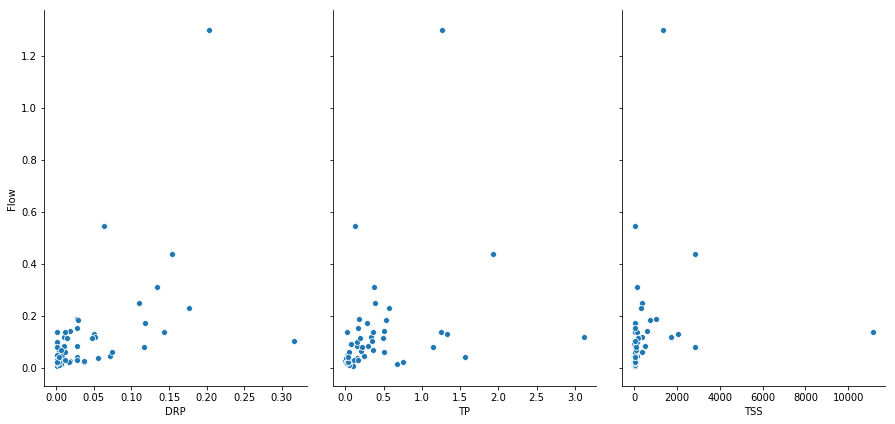

In [37]:
# visualize the relationship between flow and responses
sns.pairplot(data, x_vars=['DRP', 'TP', 'TSS'], y_vars=['Flow'], height=6, aspect=0.7)

In [ ]:
# drop the null values then revisualize

In [40]:
list_of_comparisons = ['DRP ~ Flow', 'TP ~ Flow', 'TSS ~ Flow']

for x in list_of_comparisons:
    print(x)
    result = smf.ols(formula=x, data=data).fit()
    print(result.params)

DRP ~ Flow
Intercept    0.019545
Flow         0.178041
dtype: float64
TP ~ Flow
Intercept    0.254141
Flow         1.018394
dtype: float64
TSS ~ Flow
Intercept     311.897959
Flow         1464.209054
dtype: float64
